In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from pathlib import Path
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

In [3]:
pd.set_option('display.max_columns', None)

In [39]:
pd.set_option('display.max_rows', None)

In [2]:
dataset_path = Path(r"/home/rwth1591/transfer-learning/blue_waters/data/blue_waters_dataset_processed/blue_waters_posix_withapps_no_negative_outliers_no_time_witherrors.csv")

In [3]:
df_no_outliers = pd.read_csv(dataset_path)

In [4]:
len(df_no_outliers)

792311

In [10]:
df_no_outliers.head()

,POSIX_OPENS,POSIX_FILENOS,POSIX_DUPS,POSIX_READS,POSIX_WRITES,POSIX_SEEKS,POSIX_STATS,POSIX_MMAPS,POSIX_FSYNCS,POSIX_RENAME_SOURCES,...,WRITE_100K_1M,WRITE_1M_4M,WRITE_4M_10M,WRITE_10M_100M,WRITE_100M_1G,WRITE_1G_PLUS,rank,POSIX_TOTAL_TIME,nprocs,app
0,3114,-20,-20,75409,41501580,61075,3178,0,0,-20,...,0,0,0,0,0,0,-1,213.412935,64,vasp_gam
1,24578,-1010,-1010,2135401,1583602,2345250,248139,0,1,-1010,...,116,0,0,0,0,0,0,413.544116,48,SpEC
2,8709,-288,-288,1393466,6421550,2004413,28430,0,0,-288,...,25830,506,0,0,0,0,-1,16416.053460,256,CCTM_v52_Linux2_x86_64intel
3,1120,-73,-73,24831,194999,1194,1691,0,0,-73,...,320,0,0,0,0,0,0,5.714256,32,pw.x
4,2,-3,-3,0,0,0,2,0,0,-3,...,0,0,0,0,0,0,-1,0.015716,1,ApplyObservers


In [11]:
df_no_outliers.app.unique()

array(['vasp_gam', 'SpEC', 'CCTM_v52_Linux2_x86_64intel', 'pw.x',
       'ApplyObservers', 'gofr.x', 'mosst_dynamo.x', 'lmp_xe6_kc_s',
       'scheduler.x', 'enzo.exe', 'flash4', 'Spells', 'cp.x', 'nwchem',
       'lmp_kc_dep', 'ior', 'caliop', 'a2', 'mdtest', 'PIOL-FFD',
       'Hsigma', 'nek5000', 'lmp_new', 'rad', 'split_read', 'pp.x',
       'dist', 'Grid_64_PF', 'runRSQSim', 'sord-mO', 'qcbim.x',
       'emod3d-mpi', 'osiris-2D.e', 'Climate_MPI', 'Climate_MMW',
       'penc_comm_CAF.x', 'NEKBONE', 'PortOption_MPI', 'vasp54withoutneb',
       'vasp', 'ph-dist', 'comm_penc.x', 'exec', 'harm3d', 'exec_5_1.6',
       'init_atmosphere_model', 'cldradlid09', 'pio_rearr_opts2',
       'coawstM', 'trmm', 'lbm', 'cldradlid08', 'vasp_ncl', 'real.exe',
       'MPPcrystal', 'wrf.exe', 'iotest', 'vasp_std', '3Dspectrum',
       'Radiate08', 'test_mesh_io_speed', 'mctas_wrapper', 'volumeStats',
       'PortCost_MPI', 'enzo_wise_rerun_hdf5_1_8_11.exe', 'Pcrystal',
       'SimClimate_MPI', 'stf',

Most used applications:
- SpEC: Standard Performance Evaluation Corporation, benchmark
- Flash4 physics simulation
- pw.x: Quantum Espresso
- VASP: atomic scale materials modelling, e.g. electronic structure calculations and quantum-mechanical molecular dynamics

In [4]:
df_no_outliers.groupby(by=["app"]).count()["nprocs"].sort_values(ascending=False).head(10)

app
SpEC                           326799
CCTM_v52_Linux2_x86_64intel     79586
mosst_dynamo.x                  69537
vasp_gam                        65420
Spells                          40692
pw.x                            28607
ApplyObservers                  26345
flash4                          24032
enzo.exe                        23196
scheduler.x                     14891
Name: nprocs, dtype: int64

In [4]:
most_used_apps = df_no_outliers.groupby(by=["app"]).count()["nprocs"].sort_values(ascending=False)
len(most_used_apps.index)

900

In [ ]:
apps_to_plot = most_used_apps[0:5]
apps_to_plot["SpEC"] = 50000
apps_to_plot["other"] = most_used_apps[5:].sum()
apps_to_plot.name = "counts"
apps_to_plot.index
fig, ax = plt.subplots()
ax.pie(apps_to_plot,labels=apps_to_plot.index)
plt.savefig(Path("../","../","pictures","blue_waters_app_counts_top10_pie.svg"),format="svg")

In [16]:
len(df_no_outliers["mean"].unique())

18822

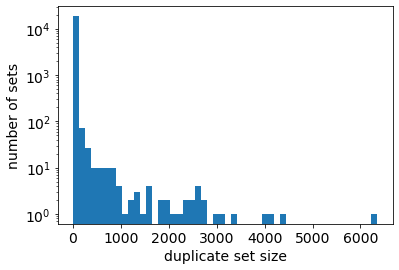

In [35]:
plt.rcParams.update({'font.size': 14})
mean_counts = pd.DataFrame(df_no_outliers["mean"]).groupby("mean",dropna=True)["mean"].count()
fig, ax = plt.subplots()
ax.hist(mean_counts.values,bins=50,log=True)
ax.set_xlabel("duplicate set size")
ax.set_ylabel("number of sets")
plt.savefig(Path("../","../","pictures","blue_waters_duplicate_set_sizes_hist").with_suffix(".svg"),format="svg",bbox_inches="tight")

<AxesSubplot:xlabel='POSIX_TOTAL_TIME'>

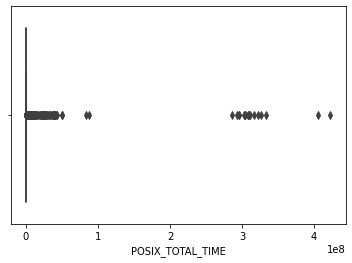

In [9]:
sns.boxplot(x=df_no_outliers.POSIX_TOTAL_TIME)

In [38]:
df_no_outliers.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
POSIX_OPENS,659457.0,1.945400e+04,5.865509e+04,0.000000e+00,1.730000e+02,3.102000e+03,1.678900e+04,8.365835e+06
POSIX_FILENOS,659457.0,-1.082080e+03,1.093889e+04,-2.839714e+06,-1.012000e+03,-2.590000e+02,-1.700000e+01,-1.000000e+00
POSIX_DUPS,659457.0,-1.082080e+03,1.093889e+04,-2.839714e+06,-1.012000e+03,-2.590000e+02,-1.700000e+01,-1.000000e+00
POSIX_READS,659457.0,1.424209e+06,2.254194e+07,0.000000e+00,5.420000e+03,1.176620e+05,1.575523e+06,5.071598e+09
POSIX_WRITES,659457.0,3.436807e+06,2.971662e+07,0.000000e+00,4.763000e+03,1.358550e+05,1.301497e+06,9.728632e+09
POSIX_SEEKS,659457.0,1.242548e+06,3.755222e+07,0.000000e+00,2.120000e+02,5.912800e+04,1.249606e+06,1.247776e+10
POSIX_STATS,659457.0,9.435913e+04,2.052229e+05,0.000000e+00,3.870000e+02,3.199000e+03,1.264970e+05,1.437219e+07
POSIX_MMAPS,659457.0,3.144531e+00,2.342422e+02,-6.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.394900e+04
POSIX_FSYNCS,659457.0,1.338135e+01,2.913910e+03,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.097152e+06
POSIX_RENAME_SOURCES,659457.0,-1.082080e+03,1.093889e+04,-2.839714e+06,-1.012000e+03,-2.590000e+02,-1.700000e+01,-1.000000e+00


In [5]:
bytes_read_copy = df_no_outliers.POSIX_BYTES_READ.copy().where(df_no_outliers.POSIX_BYTES_READ > 0,0.1)
bytes_written_copy = df_no_outliers.POSIX_BYTES_WRITTEN.copy().where(df_no_outliers.POSIX_BYTES_WRITTEN > 0,0.1)

In [6]:
def plot_df_w_filter(df,filterexp,x_column,coord,color_data=bytes_read_copy,cmap="viridis"):
    sc = coord.scatter(x=df[filterexp][x_column],y=df[filterexp]["POSIX_TOTAL_TIME"], c=np.log10(color_data[filterexp]),cmap=cmap)
    coord.set_xscale("log")
    coord.set_yscale("log")
    coord.set_xlabel(x_column)
    coord.set_ylabel("POSIX_TOTAL_TIME")
    return sc

In [10]:
def plot_mosaic(filter_spec,filename):
    plt.rcParams.update({'font.size': 25})
    fig, axs = plt.subplots(nrows = 1, ncols=2, figsize=(30, 10))
    plt.subplots_adjust(wspace=0.26)
    sc_read = plot_df_w_filter(df_no_outliers,filter_spec,"POSIX_READS",axs[0])
    sc_written = plot_df_w_filter(df_no_outliers,filter_spec,"POSIX_WRITES",axs[1],bytes_written_copy,"plasma")
    divider = make_axes_locatable(axs[0])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(sc_read, cax=cax, orientation='vertical',label="POSIX_BYTES_READ")
    divider = make_axes_locatable(axs[1])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(sc_written, cax=cax, orientation='vertical',label="POSIX_BYTES_WRITTEN")
    plt.savefig(Path("../","../","pictures",filename).with_suffix(".png"),format="png",bbox_inches="tight",dpi=600)
    plt.show()

In [13]:
most_used_apps[0:20]

Index(['SpEC', 'CCTM_v52_Linux2_x86_64intel', 'mosst_dynamo.x', 'vasp_gam',
       'Spells', 'pw.x', 'ApplyObservers', 'flash4', 'enzo.exe', 'scheduler.x',
       'lmp_new', 'ior', 'caliop', 'mdtest', 'sord-mO', 'PIOL-FFD', 'Hsigma',
       'nwchem', 'nek5000', 'h_r_f'],
      dtype='object', name='app')

In [18]:
df_no_outliers[df_no_outliers.path == "Spells"].describe()

,Unnamed: 0,POSIX_OPENS,POSIX_FILENOS,POSIX_DUPS,POSIX_READS,POSIX_WRITES,POSIX_SEEKS,POSIX_STATS,POSIX_MMAPS,POSIX_FSYNCS,POSIX_RENAME_SOURCES,POSIX_RENAME_TARGETS,POSIX_MODE,POSIX_BYTES_READ,POSIX_BYTES_WRITTEN,POSIX_MAX_BYTE_READ,POSIX_MAX_BYTE_WRITTEN,POSIX_CONSEC_READS,POSIX_CONSEC_WRITES,POSIX_SEQ_READS,POSIX_SEQ_WRITES,POSIX_RW_SWITCHES,POSIX_MEM_NOT_ALIGNED,POSIX_MEM_ALIGNMENT,POSIX_FILE_NOT_ALIGNED,POSIX_FILE_ALIGNMENT,POSIX_MAX_READ_TIME_SIZE,POSIX_MAX_WRITE_TIME_SIZE,POSIX_SIZE_READ_0_100,POSIX_SIZE_READ_100_1K,POSIX_SIZE_READ_1K_10K,POSIX_SIZE_READ_10K_100K,POSIX_SIZE_READ_100K_1M,POSIX_SIZE_READ_1M_4M,POSIX_SIZE_READ_4M_10M,POSIX_SIZE_READ_10M_100M,POSIX_SIZE_READ_100M_1G,POSIX_SIZE_READ_1G_PLUS,POSIX_SIZE_WRITE_0_100,POSIX_SIZE_WRITE_100_1K,POSIX_SIZE_WRITE_1K_10K,POSIX_SIZE_WRITE_10K_100K,POSIX_SIZE_WRITE_100K_1M,POSIX_SIZE_WRITE_1M_4M,POSIX_SIZE_WRITE_4M_10M,POSIX_SIZE_WRITE_10M_100M,POSIX_SIZE_WRITE_100M_1G,POSIX_SIZE_WRITE_1G_PLUS,POSIX_STRIDE1_STRIDE,POSIX_STRIDE2_STRIDE,POSIX_STRIDE3_STRIDE,POSIX_STRIDE4_STRIDE,POSIX_STRIDE1_COUNT,POSIX_STRIDE2_COUNT,POSIX_STRIDE3_COUNT,POSIX_STRIDE4_COUNT,POSIX_ACCESS1_ACCESS,POSIX_ACCESS2_ACCESS,POSIX_ACCESS3_ACCESS,POSIX_ACCESS4_ACCESS,POSIX_ACCESS1_COUNT,POSIX_ACCESS2_COUNT,POSIX_ACCESS3_COUNT,POSIX_ACCESS4_COUNT,POSIX_FASTEST_RANK,POSIX_FASTEST_RANK_BYTES,POSIX_SLOWEST_RANK,POSIX_SLOWEST_RANK_BYTES,READ_0_100,READ_100_1K,READ_1K_10K,READ_10K_100K,READ_100K_1M,READ_1M_4M,READ_4M_10M,READ_10M_100M,READ_100M_1G,READ_1G_PLUS,WRITE_0_100,WRITE_100_1K,WRITE_1K_10K,WRITE_10K_100K,WRITE_100K_1M,WRITE_1M_4M,WRITE_4M_10M,WRITE_10M_100M,WRITE_100M_1G,WRITE_1G_PLUS,rank,POSIX_TOTAL_TIME,nprocs
count,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.0,40500.0,40500.000000,40500.000000,40500.000000,4.050000e+04,4.050000e+04,4.050000e+04,4.050000e+04,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.00000,4.050000e+04,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.0,40500.0,40500.0,40500.0,40500.0,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.0,40500.0,40500.0,40500.0,40500.0,4.050000e+04,4.050000e+04,4.050000e+04,4.050000e+04,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.0,40500.000000,40500.0,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.0,40500.0,40500.0,40500.0,40500.0,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.0,40500.0,40500.0,40500.0,40500.0,40500.000000,40500.000000,40500.0
mean,387267.383951,165.092494,-24.935358,-24.935358,1507.261852,1640.953531,2594.903481,471.203728,0.0,0.0,-24.935358,-24.935358,5693.718815,2.084595e+06,1.833385e+07,2.071088e+07,1.835544e+07,344.287654,209.024247,908.737852,1359.967407,223.988938,152.093136,199.482864,2697.03600,2.614662e+07,82621.005383,49938.362272,998.453926,408.558543,57.724123,40.207827,2.317432,0.0,0.0,0.0,0.0,0.0,383.981037,269.986667,639.146568,319.423531,28.415728,0.0,0.0,0.0,0.0,0.0,8.261497e+06,1.404846e+06,5.016736e+05,4.690384e+05,205.065358,132.072420,110.120938,109.070099,29254.338963,92204.009802,197556.495506,7065.862148,553.175531,252.101679,231.782568,187.338642,9.516222,0.0,7.933481,0.0,998.453926,408.558543,57.724123,40.207827,2.317432,0.0,0.0,0.0,0.0,0.0,383.981037,269.986667,639.146568,319.423531,28.415728,0.0,0.0,0.0,0.0,0.0,1.513753,0.902504,11.0
std,174562.212488,12.536568,3.412209,3.412209,165.854529,11.599818,129.085699,28.256465,0.0,0.0,3.412209,3.412209,40.012859,1.367072e+06,1.018713e+07,1.292258e+07,1.018713e+07,37.553664,1.931173,97.017313,9.639105,1.574092,12.530699,27.297672,141.57732,3.577961e+06,99039.228492,47616.931880,62.777082,71.927311,23.373527,19.068539,4.840076,0.0,0.0,0.0,0.0,0.0,2.698444,1.897343,101.881349,97.245353,41.807674,0.0,0.0

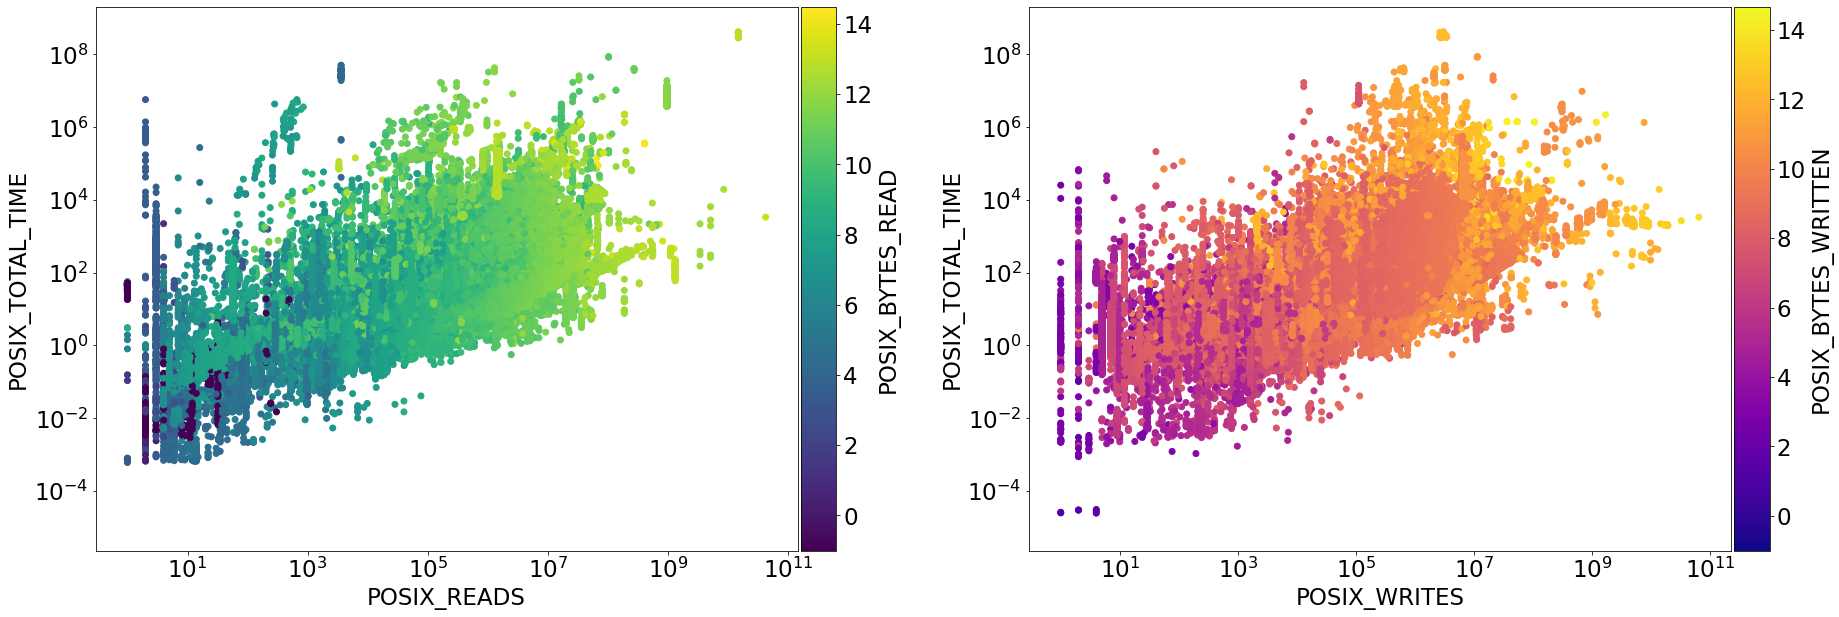

In [39]:
filter_spec = df_no_outliers.app.isin(most_used_apps[0:5])
plot_mosaic((filter_spec == False) | (filter_spec == True),"blue_waters_understand_no_IQR_all")

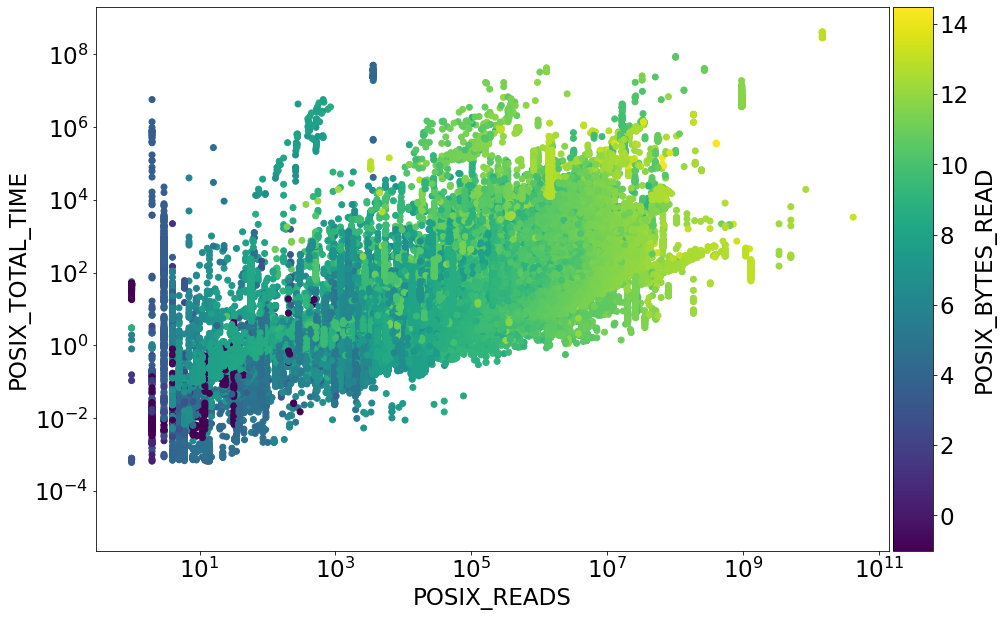

In [40]:
plt.rcParams.update({'font.size': 23})
filter_spec = df_no_outliers.app.isin(most_used_apps[0:5])
fig, axs = plt.subplots(nrows = 1, ncols=1, figsize=(15, 10))
plt.subplots_adjust(wspace=0.26)
sc_read = plot_df_w_filter(df_no_outliers,(filter_spec == False) | (filter_spec == True),"POSIX_READS",axs)
divider = make_axes_locatable(axs)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(sc_read, cax=cax, orientation='vertical',label="POSIX_BYTES_READ")
plt.savefig(Path("../","../","pictures","blue_waters_understand_no_IQR_all_readsonly").with_suffix(".png"),format="png",bbox_inches="tight",dpi=600)

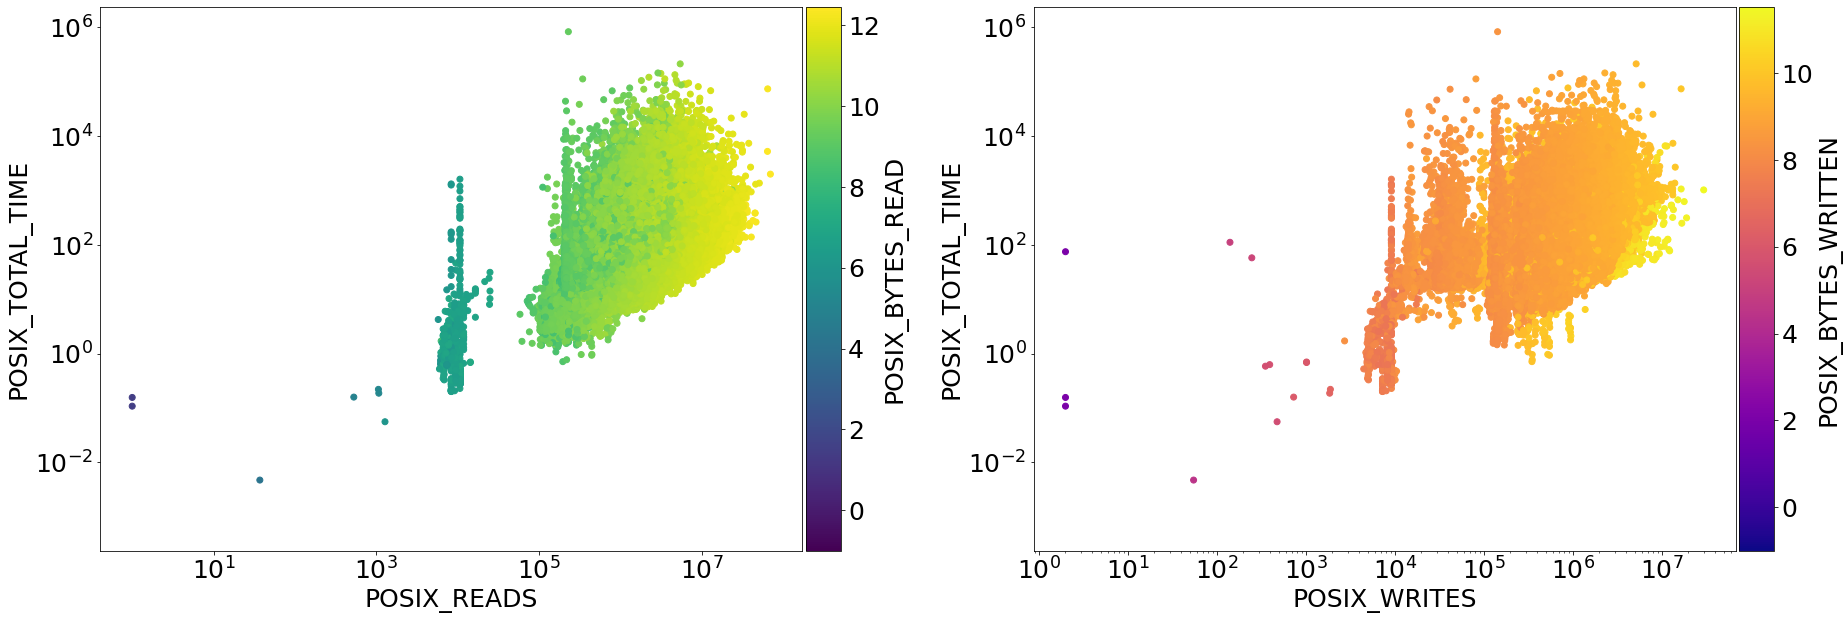

In [11]:
filter_spec = (df_no_outliers.app == "SpEC")
plot_mosaic(filter_spec == True,"blue_waters_understand_no_IQR_SpEC_small")

In at least 30% of the rows the rank is 0 or -1, possibly not known?

In [47]:
len(df_no_outliers["rank"][df_no_outliers["rank"] == -1]) / len(df_no_outliers)

0.5654992433179975

In [48]:
len(df_no_outliers["rank"][df_no_outliers["rank"] == 0]) / len(df_no_outliers)

0.3046198544865632